# SPRINT 8: Tasca Feature Engineering

Descripció
Aprèn a gestionar paràmetres amb Python.

## NIVELL 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

Per a realitzar aquest sprint utilitzo el mateix conjunt de dades que els sprints anteriors, relacionat amb les jugadores del mundial de futbol femení 2019.



In [1]:
# Crido a les llibreries que necessito
# Faig entrar l'arxiu CSV gràcies a pandas

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

women = pd.read_csv("C:\\Users\\Anna\DataScience\\SPRINTS\\SPRINT 5\\Womens Squads.csv", encoding = "ISO-8859-1", engine='python', sep=";")

display(women)

,Squad no.,Country,Pos.,Player,DOB,Age,Caps,Goals,Club
0,1,US,GK,Alyssa Naeher,20-abr-88,31,43.0,0.0,Chicago Red Stars
1,2,US,FW,Mallory Pugh,29-abr-98,21,50.0,15.0,Washington Spirit
2,3,US,MF,Sam Mewis,09-oct-92,26,47.0,9.0,North Carolina Courage
3,4,US,DF,Becky Sauerbrunn,06-jun-85,34,155.0,0.0,Utah Royals
4,5,US,DF,Kelley O'Hara,04-ago-88,30,115.0,2.0,Utah Royals
...,...,...,...,...,...,...,...,...,...
547,19,France,DF,Griedge Mbock Bathy,26-feb-95,24,49.0,4.0,Lyon
548,20,France,FW,Delphine Cascarino,05-feb-97,22,11.0,1.0,Lyon
549,21,France,GK,Pauline Peyraud-Magnin,17-mar-92,27,1.0,0.0,Arsenal
550,22,France,DF,Julie Debever,18-abr-88,31,2.0,0.0,Guingamp


In [2]:
women.count()

Squad no.    552
Country      552
Pos.         552
Player       552
DOB          552
Age          552
Caps         520
Goals        520
Club         552
dtype: int64

In [3]:
# Com que en l'anterior punt veiem que les columnes "Caps" i "Goals" tenen menys quantitat de dades que la resta de columnes, em fa sospitar que hi ha nuls en aquest dataset, per tant ho comprovo

print(women.isnull())

print("____________________________________________________________________________")

print(women.count())

print("____________________________________________________________________________")

print(women.isnull().sum())

     Squad no.  Country   Pos.  Player    DOB    Age   Caps  Goals   Club
0        False    False  False   False  False  False  False  False  False
1        False    False  False   False  False  False  False  False  False
2        False    False  False   False  False  False  False  False  False
3        False    False  False   False  False  False  False  False  False
4        False    False  False   False  False  False  False  False  False
..         ...      ...    ...     ...    ...    ...    ...    ...    ...
547      False    False  False   False  False  False  False  False  False
548      False    False  False   False  False  False  False  False  False
549      False    False  False   False  False  False  False  False  False
550      False    False  False   False  False  False  False  False  False
551      False    False  False   False  False  False  False  False  False

[552 rows x 9 columns]
____________________________________________________________________________
Squad no.  

In [4]:
# Eliminem les files que contenen algun valor nul i comprobem que s'han eliminat, de manera que totes les files tenen la mateixa mida ara.

women = women.dropna(subset=["Caps", "Goals"])

women.count()

Squad no.    520
Country      520
Pos.         520
Player       520
DOB          520
Age          520
Caps         520
Goals        520
Club         520
dtype: int64

In [5]:
women.describe()

,Squad no.,Age,Caps,Goals
count,520.000000,520.000000,520.000000,520.000000
mean,11.867308,26.178846,43.661538,7.348077
std,6.609365,3.996715,43.674846,15.541727
min,1.000000,16.000000,0.000000,0.000000
25%,6.000000,23.000000,11.750000,0.000000
50%,12.000000,26.000000,29.500000,1.500000
75%,18.000000,29.000000,62.000000,8.250000
max,23.000000,41.000000,282.000000,181.000000


In [6]:
women.dtypes

Squad no.      int64
Country       object
Pos.          object
Player        object
DOB           object
Age            int64
Caps         float64
Goals        float64
Club          object
dtype: object

### CONVERTIR A DUMMY

Anem a normalitzar els atributs categòrics en dummy, això vol dir que convertirem els valors en 0 i 1, creant un nou dataset que concatenarem amb el dataset original per poder-los treballar més fàcilment.

In [7]:
# Imprimint els tipus en la línia anterior, sabem quins hem de convertir en dummys, ho faré un per un per veure com funciona cada columna
dummyCountry = pd.get_dummies(women["Country"])
dummyCountry.head()

,Argentina,Australia,Brazil,Cameroon,Canada,Chile,China PR,England,France,Germany,...,New Zealand,Nigeria,Norway,Scotland,South Africa,South Korea,Spain,Sweden,Thailand,US
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
dummyPosition = pd.get_dummies(women["Pos."])
dummyPosition.head()

,DF,FW,GK,MF
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


In [9]:
dummyPlayer = pd.get_dummies(women["Player"])
dummyPlayer.head()

,Abbie McManus,Abby Dahlkemper,Abby Erceg,Adriana Leon,Adriana Sachs,Adrianna Franch,Agustina Barroso,Ainon Phancha,Aitana Bonmatí,Aivi Luik,...,Yessenia López,Yui Hasegawa,Yuika Sugasawa,Yuka Momiki,Yvonne Leuko,Ze?ira Muovi?,Zhang Rui,Ève Périsset,Élise Bussaglia,Érika
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dummyDOB = pd.get_dummies(women["DOB"])
dummyDOB.head()

,01-abr-95,01-abr-97,01-ago-87,01-dic-94,01-dic-95,01-feb-88,01-feb-89,01-jul-90,01-jul-91,01-jul-98,...,30-sep-85,30-sep-94,31-ago-99,31-dic-96,31-ene-90,31-ene-91,31-ene-97,31-jul-87,31-mar-95,31-may-94
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dummyClub = pd.get_dummies(women["Club"])
dummyClub.head()

,1. FFC Frankfurt,3B da Amazônia [pt],AC Nagano Parceiro,ADO Den Haag,AWA Yaoundé,Air Force United,Ajax,Albirex Niigata,Amazone FAP,Ambilly [fr],...,Vittsjö,Växjö,Vålerenga,Washington Spirit,West Florida Argonauts,West Ham United,Western Springs,Wolfsburg,Wuhan Jianghan University [zh],Zaragoza
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Veiem que hi ha atributs que s'han convertit en 520 columnes, això passa perquè per exemple, els només de les jugadores són únics. 
No acabo d'entendre quina finalitat podria tenir convertir aquest atribu en dummy.
Per exemple, però, si que podria entendre el de la data de naixament (DOB) o el del club, ja que ens podria ajudar a treure estadísitques i conclusions interessants (per exemple, la majoria d'esportistes professionals són nascuts entre el gener i el juny, això passa perquè eren els grans de la seva edat, destacaven més quan eren petits i per això solen arribar més lluny, per un cúmul d'aptetar-los/animar-los més, per les capacitats que tenien, per la confiança en ells, etc)

Concatenaré els nous dataframes amb l'original, per veure com canvia el format de l'original, sobretot en la forma i tamany.

In [12]:
women1 = pd.concat([women, dummyCountry,dummyPosition, dummyPlayer, dummyDOB, dummyClub], axis =1)
display(women1)

,Squad no.,Country,Pos.,Player,DOB,Age,Caps,Goals,Club,Argentina,...,Vittsjö,Växjö,Vålerenga,Washington Spirit,West Florida Argonauts,West Ham United,Western Springs,Wolfsburg,Wuhan Jianghan University [zh],Zaragoza
0,1,US,GK,Alyssa Naeher,20-abr-88,31,43.0,0.0,Chicago Red Stars,0,...,0,0,0,0,0,0,0,0,0,0
1,2,US,FW,Mallory Pugh,29-abr-98,21,50.0,15.0,Washington Spirit,0,...,0,0,0,1,0,0,0,0,0,0
2,3,US,MF,Sam Mewis,09-oct-92,26,47.0,9.0,North Carolina Courage,0,...,0,0,0,0,0,0,0,0,0,0
3,4,US,DF,Becky Sauerbrunn,06-jun-85,34,155.0,0.0,Utah Royals,0,...,0,0,0,0,0,0,0,0,0,0
4,5,US,DF,Kelley O'Hara,04-ago-88,30,115.0,2.0,Utah Royals,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,19,France,DF,Griedge Mbock Bathy,26-feb-95,24,49.0,4.0,Lyon,0,...,0,0,0,0,0,0,0,0,0,0
548,20,France,FW,Delphine Cascarino,05-feb-97,22,11.0,1.0,Lyon,0,...,0,0,0,0,0,0,0,0,0,0
549,21,France,GK,Pauline Peyraud-Magnin,17-mar-92,27,1.0,0.0,Arsenal,0,...,0,0,0,0,0,0,0,0,0,0
550,22,France,DF,Julie Debever,18-abr-88,31,2.0,0.0,Guingamp,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(women.shape)
print("________________________________________________________________________")
print(women1.shape)

(520, 9)
________________________________________________________________________
(520, 1230)


Hem passat de tenir un dataset de 9 atributs amb 520 files, a tenir un dataset de 1230 atributs i 520 files

### ESTANDARITZAR AMB STANDARDSCALER

Ara procedim a estandaritzar els atributs numèrics amb StandardScaler. Tornaré a utilitzar el dataset original per a una millor comprensió dels valors.
Una transformació d'escala estàndard és mapar les dades de l'escala original a una escala entre zero i un. Això normalment s'anomena normalització de dades.

In [14]:
# Imprimim els tipus de dades per saber amb quines hem de treballar
women.dtypes

Squad no.      int64
Country       object
Pos.          object
Player        object
DOB           object
Age            int64
Caps         float64
Goals        float64
Club          object
dtype: object

In [15]:
# Només tinc 4 atributs numèrics, i els "extrec" del dataset
numerics = women.iloc[: , [5,6,7]]
print(numerics)

     Age   Caps  Goals
0     31   43.0    0.0
1     21   50.0   15.0
2     26   47.0    9.0
3     34  155.0    0.0
4     30  115.0    2.0
..   ...    ...    ...
547   24   49.0    4.0
548   22   11.0    1.0
549   27    1.0    0.0
550   31    2.0    0.0
551   26    3.0    0.0

[520 rows x 3 columns]


In [16]:
# Importo la llibreria StandardScaler
from sklearn.preprocessing import StandardScaler


In [17]:
# Calculo la mitjana de les columnes

numerics.mean()

Age      26.178846
Caps     43.661538
Goals     7.348077
dtype: float64

In [18]:
# Calculo la desviació estandar de les columnes

numerics.std()

Age       3.996715
Caps     43.674846
Goals    15.541727
dtype: float64

In [19]:
# Creo un objecte anomenat scaler que contingui els atributs numèrics del meu dataset per a poder-los treballar

scaler = StandardScaler().fit(numerics)
print(scaler)

StandardScaler()


In [20]:
# Calculo la mitjana de les columnes amb scaler per veure si em surt el mateix
scaler.mean_

array([26.17884615, 43.66153846,  7.34807692])

In [21]:
# Calculo la desviació estandar de les columnes amb scaler per veure si em surt el mateix
scaler.scale_

array([ 3.9928704 , 43.63283059, 15.52677576])

In [22]:
# Anem a estandaritzar els valors 

numericScaled = scaler.transform(numerics)
print (numericScaled)

[[ 1.2074406  -0.01516148 -0.47325195]
 [-1.29702335  0.14526817  0.49282112]
 [-0.04479137  0.07651261  0.10639189]
 ...
 [ 0.20565502 -0.97773942 -0.47325195]
 [ 1.2074406  -0.9548209  -0.47325195]
 [-0.04479137 -0.93190238 -0.47325195]]


In [23]:
# Calculo la mitjana de les columnes escalades
print (numericScaled.mean(axis=0)) #marco l'axis=0 perquè se m'imprimeixin totes les columnes

[-4.09928501e-16 -4.09928501e-17  8.54017711e-18]


In [24]:
# Calculo la desviació estandard de les columnes escalades
print (numericScaled.std(axis=0)) #marco l'axis=0 perquè se m'imprimeixin totes les columnes

[1. 1. 1.]


Veiem doncs, com hem convertit les mitjanes en un número 0 (el número negatiu final ens indica els 0 que té al davant) i les desviacions típiques ara són 1.



## NIVELL 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.
El següent pas de la PCA és projectar els elements a dues dimensions, això vol dir que si tinc quatre columnes (4 dimensions), haig de convertir-ho en dues columnes (2 dimensions)



In [25]:
# Importo la llibreria necessaria
from sklearn.decomposition import PCA

# Faig la projecció a 2D

pca = PCA(n_components=2)

componentsPrincipals = pca.fit_transform(numericScaled)

dosDdataset = pd.DataFrame(data= componentsPrincipals,
                          columns= ["componentPrincipal1", "componentPrincipal2"]
                          )
dosDdataset.head()

,componentPrincipal1,componentPrincipal2
0,0.358993,-1.225922
1,-0.311699,1.314571
2,0.085117,0.107340
3,2.397978,-1.644508
4,1.356903,-0.853255


In [26]:
# Concatenem el dataset 2D amb l'atribut categòric "Pos." (posició on juguen) en un dataset final, aquest dataset final és el que farem servir per fer gràfics

womenFinal =pd.concat([women[["Pos."]] , dosDdataset], axis=1)

womenFinal.head()


,Pos.,componentPrincipal1,componentPrincipal2
0,GK,0.358993,-1.225922
1,FW,-0.311699,1.314571
2,MF,0.085117,0.107340
3,DF,2.397978,-1.644508
4,DF,1.356903,-0.853255


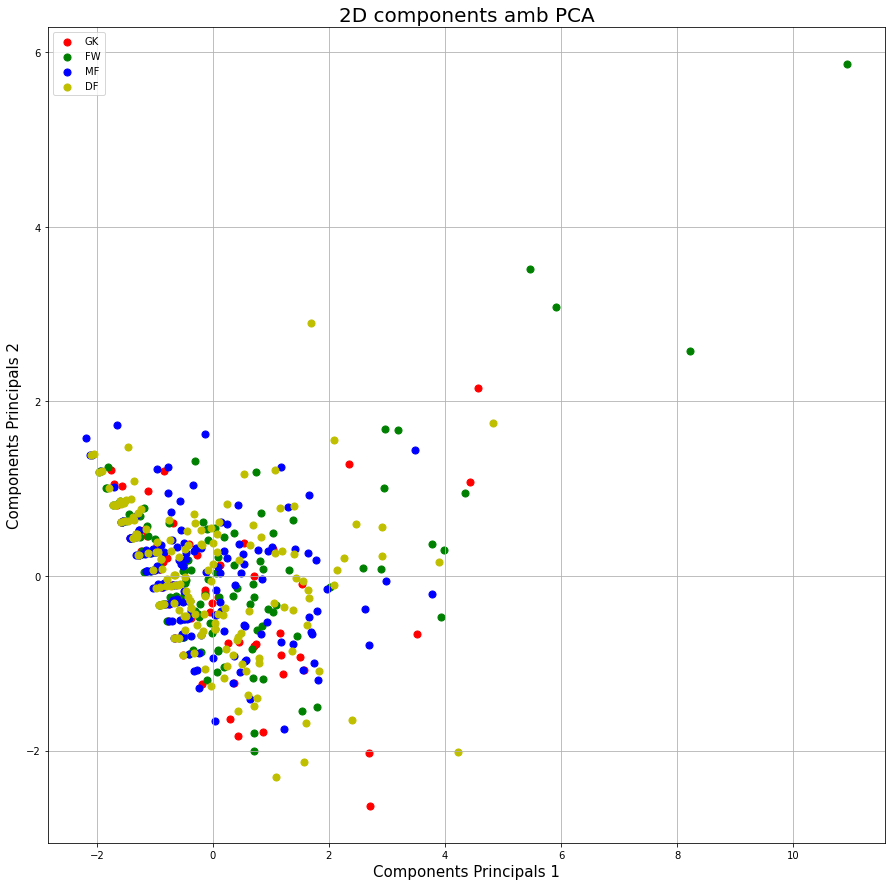

In [27]:
# Fem un gràfic amb la informació anterior
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Components Principals 1', fontsize = 15)
ax.set_ylabel('Components Principals 2', fontsize = 15)
ax.set_title('2D components amb PCA', fontsize = 20)

posicions = ["GK", "FW", "MF", "DF"]
colors = ["r", "g", "b", "y"]

for posicio, color in zip(posicions,colors):
    mantenir = womenFinal["Pos."] == posicio
    ax.scatter(womenFinal.loc[mantenir, "componentPrincipal1"],
              womenFinal.loc[mantenir, "componentPrincipal2"],
              c = color,
              s = 50)

ax.legend(posicions)
ax.grid()


In [28]:
# Veiem com ens queda repartida la variança en els dos components, un 68% en el primer i un 22% en el segon

pca.explained_variance_ratio_

array([0.6871727 , 0.22672172])



## NIVELL 3
### Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.



Utilitzarem el RobustScaler, el qual utilitza la mediana en comptes de la mitjana i dos quartils (IQR) en comptes del mínim i el màxim.
Primer mirem els outliers de cada columna amb un boxplot

In [49]:
numerics.dtypes

Age        int64
Caps     float64
Goals    float64
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Caps'}>],
       [<AxesSubplot:title={'center':'Goals'}>, <AxesSubplot:>]],
      dtype=object)

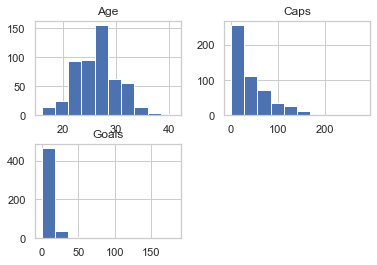

In [57]:
 numerics.hist()

C:\Users\Anna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


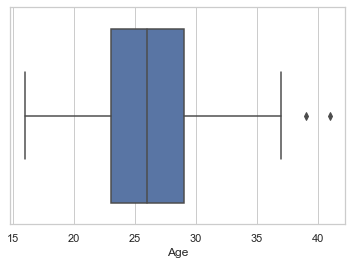

In [46]:
sns.set(style="whitegrid")
ax = sns.boxplot(numerics.Age)

C:\Users\Anna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


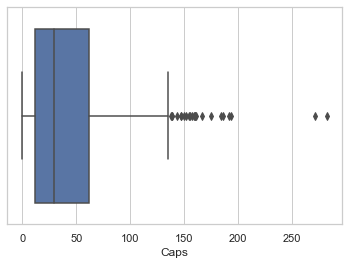

In [50]:
sns.set(style="whitegrid")
ax = sns.boxplot(numerics.Caps)

C:\Users\Anna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


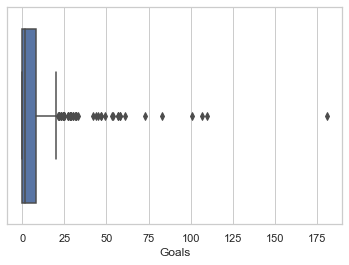

In [48]:
sns.set(style="whitegrid")
ax = sns.boxplot(numerics.Goals)

In [52]:
# Importo la llibreria necessaria
from sklearn.preprocessing import RobustScaler

# creem un robustScaler per treballar el dataset
trans = RobustScaler()
numericsRobust = trans.fit_transform(numerics)

# convertim la array en un dataset
numericsRobustDS = pd.DataFrame(numericsRobust)
numericsRobustDS.columns=["Age", "Caps", "Goals"]

print(numericsRobustDS.describe())
print(numericsRobust)


              Age        Caps       Goals
count  520.000000  520.000000  520.000000
mean     0.029808    0.281822    0.708858
std      0.666119    0.869151    1.883846
min     -1.666667   -0.587065   -0.181818
25%     -0.500000   -0.353234   -0.181818
50%      0.000000    0.000000    0.000000
75%      0.500000    0.646766    0.818182
max      2.500000    5.024876   21.757576
[[ 0.83333333  0.26865672 -0.18181818]
 [-0.83333333  0.4079602   1.63636364]
 [ 0.          0.34825871  0.90909091]
 ...
 [ 0.16666667 -0.56716418 -0.18181818]
 [ 0.83333333 -0.54726368 -0.18181818]
 [ 0.         -0.52736318 -0.18181818]]


Veiem que els valors s'han ajustat al que li hem demanat,  els valors de la mediana són 0 i la desviació estandard són propers a 1.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Caps'}>],
       [<AxesSubplot:title={'center':'Goals'}>, <AxesSubplot:>]],
      dtype=object)

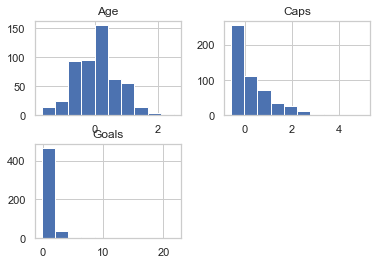

In [53]:
 numericsRobustDS.hist()

C:\Users\Anna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


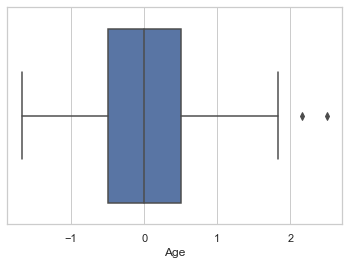

In [54]:
sns.set(style="whitegrid")
ax = sns.boxplot(numericsRobustDS.Age)

C:\Users\Anna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


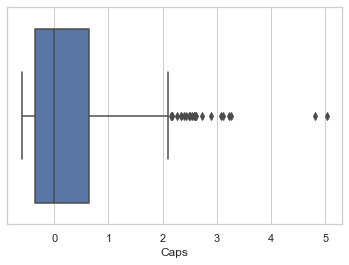

In [55]:
sns.set(style="whitegrid")
ax = sns.boxplot(numericsRobustDS.Caps)

C:\Users\Anna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


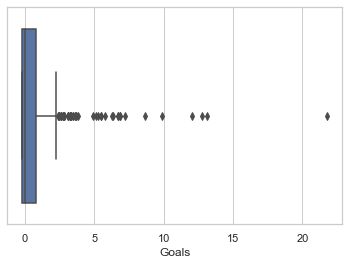

In [56]:
sns.set(style="whitegrid")
ax = sns.boxplot(numericsRobustDS.Goals)